# Univariate analysis using NHANES data

In [35]:
# Initial Imports 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline

In [36]:
# Use pandas to read csv and create a DataFrame
df = pd.read_csv(Path('data/nhanes_2015_2016.csv'))
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


### Data Wrangling

In [37]:
# rename the columns we are interested with useful/meaninful names 
df.rename(columns={'RIAGENDR':'Gender', 
                  'RIDAGEYR':'Age',
                  'DMDMARTL':'Martial_Status'}, inplace = True)

# replace interger code with meaningful text
df['Gender'] = df['Gender'].replace({1:'Male', 2:'Female'})
df['Martial_Status'] = df['Martial_Status'].replace(
    {
        1.0:'Married',
        2.0:'Widowed',
        3.0:'Divorced',
        4.0:'Separated',
        5.0:'Never Married',
        6.0:'Living with partner',
        77.0:"Refused",
        99:None # 99 represents unknown status, equilavent to Nulls
    })

# create a DataFrame with Gender, Age, and Martial_Status column 
df = df[['Age','Gender','Martial_Status']]

# show few rows of data
df.head()

,Age,Gender,Martial_Status
0,62,Male,Married
1,53,Male,Divorced
2,78,Male,Married
3,56,Female,Living with partner
4,42,Female,Divorced


In [38]:
# Summary Statistics of Age 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5735.0,48.05231,18.431011,18.0,32.0,48.0,63.0,80.0


### Frequency Tables
Frequency distribution of martial status among different age groups and gender

In [145]:
df['Martial_Status'].value_counts()

Married                2780
Never Married          1004
Divorced                579
Living with partner     527
Widowed                 396
Separated               186
Refused                   2
Name: Martial_Status, dtype: int64

In [ ]:
# Drop rows that have refused category, there are only two here. 
df = df[df['Martial_Status'] != 'Refused']

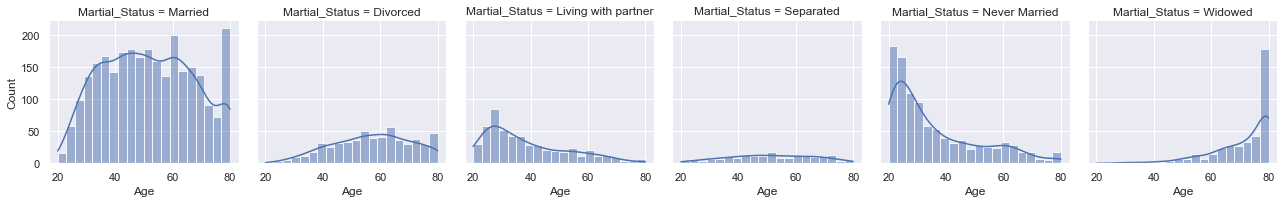

In [171]:
# visualizing dist of martial status among different age groups for all people
sns.displot(data=df, x='Age', col='Martial_Status',binwidth=3, height=3, 
            kde=True,facet_kws=dict(margin_titles=True))
plt.show()

It is easy to notice how martial status changes from one age group to another. For example, the number of never married responses decrease among the older population.

In [177]:
# martial_status for men and women frequncy tables
print('Frequency Table of Male Martial Status')
display(df[df['Gender']=='Male']['Martial_Status'].value_counts().to_frame())
print('Frequency Table of Female Martial Status')
display(df[df['Gender']=='Female']['Martial_Status'].value_counts().to_frame())

Frequency Table of Male Martial Status


,Martial_Status
Married,1477
Never Married,484
Living with partner,265
Divorced,229
Widowed,100
Separated,68


Frequency Table of Female Martial Status


,Martial_Status
Married,1303
Never Married,520
Divorced,350
Widowed,296
Living with partner,262
Separated,118


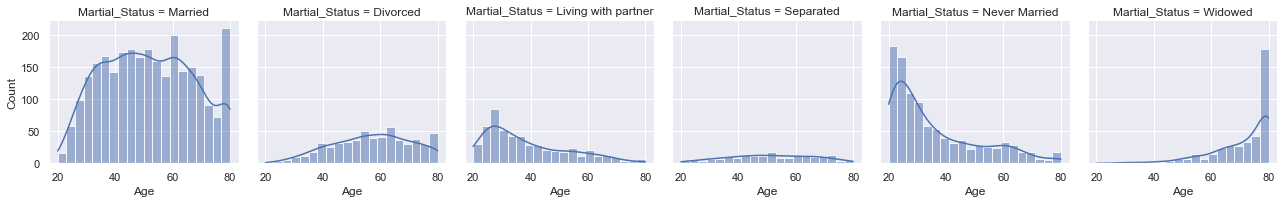

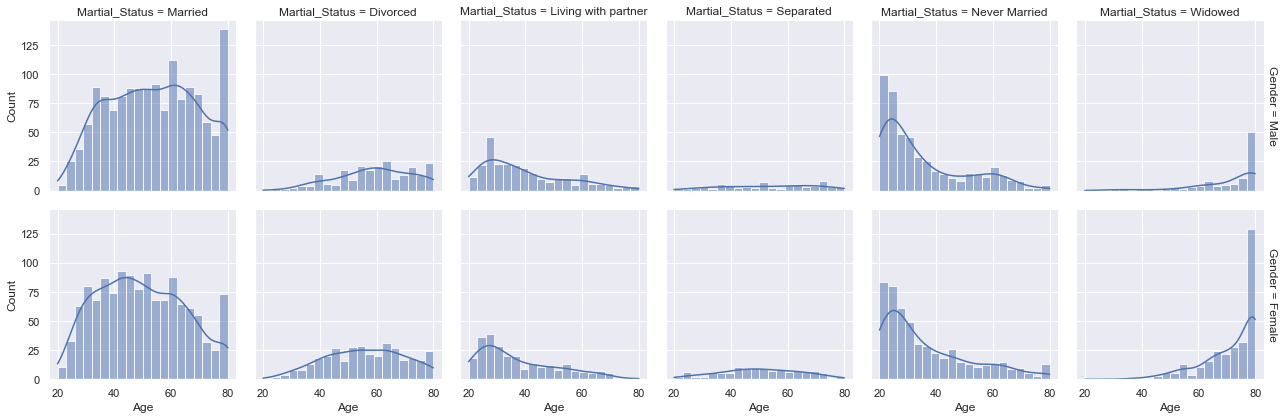

In [184]:
# visualizing dist of martial status among different age groups for male and female
sns.displot(data=df, x='Age', col='Martial_Status',binwidth=3, height=3, 
            kde=True,facet_kws=dict(margin_titles=True))
sns.displot(data=df, x='Age', col='Martial_Status', row='Gender', binwidth=3, height=3, 
            kde=True,facet_kws=dict(margin_titles=True))
plt.show()

One interesting observation from these graphs is that there seems to be a lot more widow statuses for females than males. Other than that, the distributions for both male and female are almost identical to that of the entire population in this study. 

In [191]:
# frequency table for people between 30-40
df[(df['Age']>=30)&(df['Age']<=40)]['Martial_Status'].value_counts().to_frame()

,Martial_Status
Married,560
Never Married,217
Living with partner,143
Divorced,70
Separated,30
Widowed,5


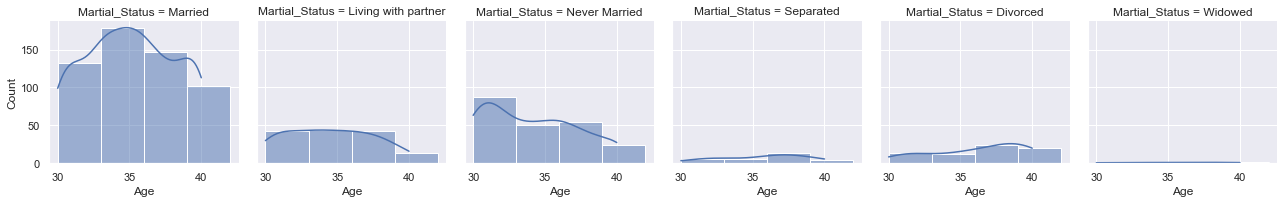

In [193]:
# distribution graphs for people between 30-40
sns.displot(data=df[(df['Age']>=30)&(df['Age']<=40)], x='Age', col='Martial_Status',binwidth=3, height=3, 
            kde=True,facet_kws=dict(margin_titles=True))
plt.show()

Most of the population between the ages 30-40 are married, and widow status is very low among these group 